## Parsing datetime data and plotting

In [33]:
import pandas as pd

In [34]:
df = pd.read_csv("./data/landslides.csv")
df.head()

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,NaN
1,42,3/22/07,NaN,United States,Ohio,17288,Landslide,Rain,NaN
2,56,4/6/07,NaN,United States,Pennsylvania,15930,Landslide,Rain,NaN
3,59,4/14/07,NaN,Canada,Quebec,42786,Riverbank collapse,Rain,NaN
4,61,4/15/07,NaN,United States,Kentucky,6903,Landslide,Downpour,0.0


In [35]:
# Task:
# Convert the 'date' column into a DateTime data type. 
# Extract month from the date to visualize their frequencies using a histogram or KDE plot.

### Date time parsing using .to_datetime()

In [36]:
df.info() # we see that the 'date' column is of type 'object'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1693 non-null   int64  
 1   date            1690 non-null   object 
 2   time            629 non-null    object 
 3   country_name    1693 non-null   object 
 4   state/province  1692 non-null   object 
 5   population      1693 non-null   int64  
 6   landslide_type  1692 non-null   object 
 7   trigger         1691 non-null   object 
 8   fatalities      1446 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 119.2+ KB


In [37]:
df['parsed_date'] = pd.to_datetime(df['date'], format="%m/%d/%y") # converting
df

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities,parsed_date
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,NaN,2007-03-02
1,42,3/22/07,NaN,United States,Ohio,17288,Landslide,Rain,NaN,2007-03-22
2,56,4/6/07,NaN,United States,Pennsylvania,15930,Landslide,Rain,NaN,2007-04-06
3,59,4/14/07,NaN,Canada,Quebec,42786,Riverbank collapse,Rain,NaN,2007-04-14
4,61,4/15/07,NaN,United States,Kentucky,6903,Landslide,Downpour,0.0,2007-04-15
...,...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,NaN,United States,North Carolina,1646,Rockfall,NaN,0.0,2015-12-07
1689,7537,2/22/16,0:00,United States,West Virginia,51400,Mudslide,Unknown,0.0,2016-02-22
1690,7539,2/23/16,NaN,United States,West Virginia,2406,Landslide,Rain,0.0,2016-02-23
1691,7540,2/26/16,21:06,United States,West Virginia,1048,Rockfall,Unknown,0.0,2016-02-26


In [38]:
# we can now extract the month name
m_names = df['parsed_date'].dt.month_name()
m_names

0          March
1          March
2          April
3          April
4          April
          ...   
1688    December
1689    February
1690    February
1691    February
1692       March
Name: parsed_date, Length: 1693, dtype: object

In [39]:
# or simply month number
m_numbers = df['parsed_date'].dt.month
m_numbers

0        3.0
1        3.0
2        4.0
3        4.0
4        4.0
        ... 
1688    12.0
1689     2.0
1690     2.0
1691     2.0
1692     3.0
Name: parsed_date, Length: 1693, dtype: float64

### plotting part:

C:\Users\uzo\AppData\Local\Temp\ipykernel_9644\543841002.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(m_numbers, kde=False, bins=12);


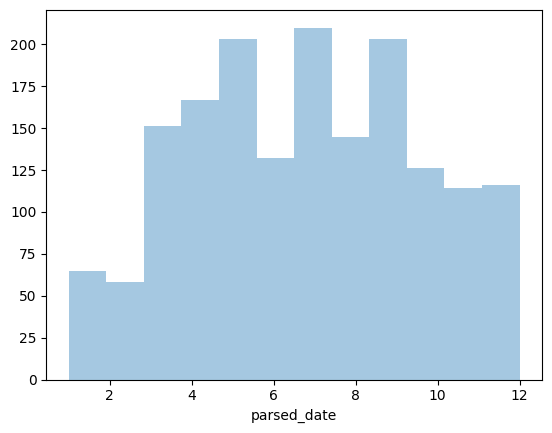

In [40]:
# author provides a solution with seaborn distplot,
# but that will soon be deprecated.
import seaborn as sns
sns.distplot(m_numbers, kde=False, bins=12);

##### another way:

In [41]:
# let's do it with seaborn histplot

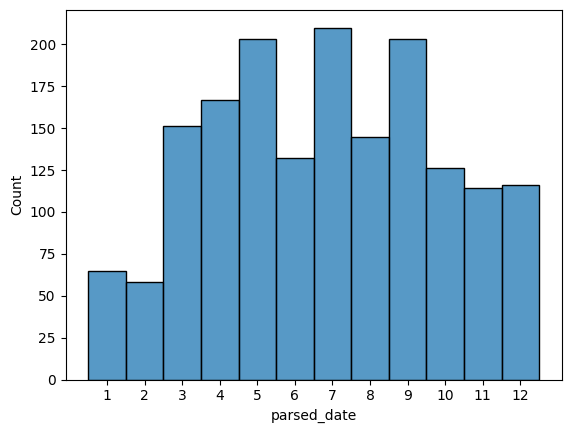

In [42]:
ax = sns.histplot( m_numbers, bins=12, discrete=True) #
ax.set_xticks(range(1,13)); # setting also x ticks!

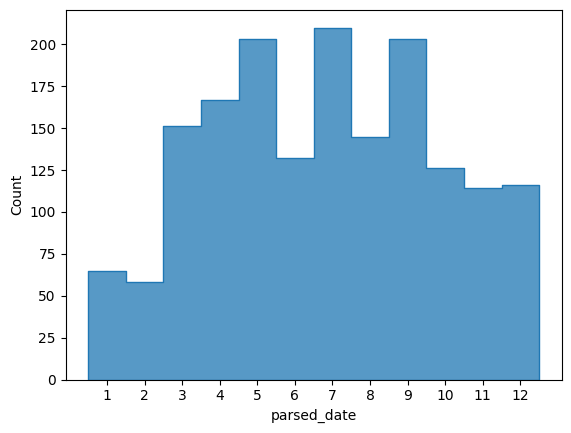

In [43]:
ax = sns.histplot( m_numbers, bins=12, discrete=True, element='step') # adjusting a bit
ax.set_xticks(range(1,13)); # setting also x ticks!

##### yet another way:

In [44]:
# another way, using bar plot

In [45]:
# extracting month names, and applying value_counts
m_counts = df['parsed_date'].dt.month_name().value_counts()
m_counts

parsed_date
July         210
May          203
September    203
April        167
March        151
August       145
June         132
October      126
December     116
November     114
January       65
February      58
Name: count, dtype: int64

In [46]:
# arranging months in order
m_counts = m_counts.loc[
    ['January','February','March','April','May','June',
     'July','August','September','October','November','December']
    ]

m_counts

parsed_date
January       65
February      58
March        151
April        167
May          203
June         132
July         210
August       145
September    203
October      126
November     114
December     116
Name: count, dtype: int64

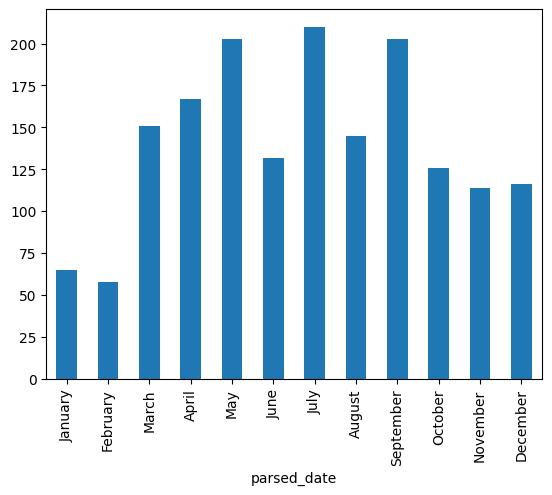

In [47]:
# and simple plotting directly from pandas
m_counts.plot(kind='bar');

In [48]:
# hotovo